# Flight Price Prediction Project

In [119]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# TRAIN DATA

In [120]:
# Loading the train data.

df_flight_train = pd.read_excel(r'C:\Users\nayee\OneDrive\Desktop\Flight_price_prediction\Copy of Data_Train.xlsx')
df_flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [121]:
df_flight_train.shape

(10683, 11)

In [122]:
# Let's check the data types of each feature.

df_flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The whole data is of string nature except for the target variable which is of integer type having 10683 rows andd 11 columns. The attributes to predict the price of the flight ticket are described below.

There are attribbutes which are of date and time nature but are of string type, So we need to convert the data type into date time format of such attributes inorder to get the day, month, hour and minutes of such attributes to train and test the data and the model can proerly and easily work.

In [123]:
# Let's check the null values.

df_flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

From the above it is reflecting that 'Route' and 'Total_Stops' have null value that is in whole dataset the there is only 1 value missing in the respective columns.

In [124]:
# Let's check the string data from the dataset.

flight_cat = df_flight_train.select_dtypes(include='object')
flight_cat.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [125]:
# Let's check  the value counts of each categorical feature.

for i in flight_cat.columns:
    x = flight_cat[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Airline --------
 Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


-------- Date_of_Journey --------
 18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/201

'Route' and 'Total_Stops' are related to each other. As, the 'Route' depicts the no. of stopages from the source location to the destination where the flight will stop. And 'Total_Stops' is depicting the total no. of stopages in the route. Thus, the 'Route' column can be dropped from the dataset.

Later, in the dataset all these string values need to be converted. Also, there tare attributes which are need s to be converted into date time data type as the price of the flight ticket also depends upon the time and date of the journey as different dates will present different seasons on which the ticket price varies.

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Price', ylabel='Density'>

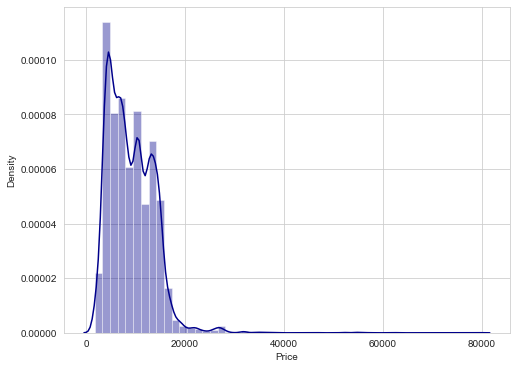

In [126]:
# Visualizing the distribution of target variable.

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df_flight_train['Price'], color = 'darkblue')

The Price is rightly skewed

In [127]:
# Visualizing the categorical features

#count_attri = df_flight_train[['Airline','Source','Destination','Total_Stops','Additional_Info']]

#for i in count_attri.columns:
#    plt.figure(figsize=(12,4))
#    x = sns.countplot(count_attri[i], hue='Price', data=df_flight_train)
#   plt.show()

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

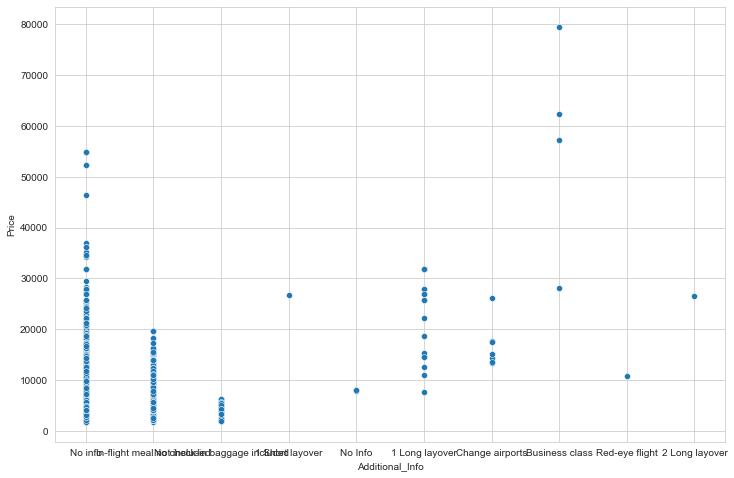

In [128]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Additional_Info', y='Price', data=df_flight_train)

FILLING THE NULL VALUES

In [129]:
# Let's check the mode of the Total_Stops.

stop_mode = df_flight_train['Total_Stops'].mode()
print("Mode of Total_Stops :", stop_mode)

Mode of Total_Stops : 0    1 stop
dtype: object


In [130]:
# Replacing the null value with the mode column.

df_flight_train.Total_Stops = df_flight_train.Total_Stops.fillna('1 stop')

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


<AxesSubplot:>

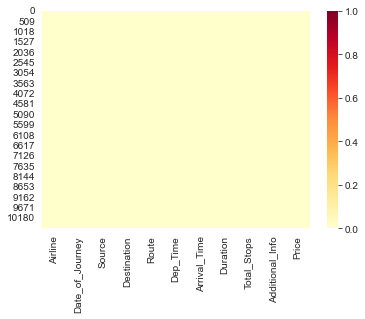

In [131]:
# Again checking the null values after filling the same.

print(df_flight_train.isnull().sum())
sns.heatmap(df_flight_train.isnull(), cmap = 'YlOrRd')

From above, it's clear that there are no null values present in the dataset.

CONVERTING DATA TYPE

The attributes -> 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' and 'Duration' are of object type in the dataset, but these are need to be converted into date time data type respectively in order to make the data more clear about such columns and better predictions can be made.

In [132]:
# Converting the data type of 'Date_of_Journey' and extracting the month and day of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_train['Journey_Day'] = pd.to_datetime(df_flight_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_flight_train['Journey_Month'] = pd.to_datetime(df_flight_train.Date_of_Journey, format="%d/%m/%Y").dt.month

# Converting the data type of 'Dep_Time' and extracting the hours and minutes of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_train['Dep_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Dep_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute

# Converting the data type of 'Arrival_Time' and extracting the hours and minutes of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_train['Arrival_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Arrival_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute

# Converting the data type of 'Duration' and extracting the hours and minutes of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_train['Duration_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Duration_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute

In [133]:
# Let's see the value counts of 'Journey_Day' and 'Journey_Month'.

print("----Journey_Day---- \n",df_flight_train['Journey_Day'].value_counts())
print("\n")
print("----Journey_Month---- \n",df_flight_train['Journey_Month'].value_counts())

----Journey_Day---- 
 9     1406
6     1288
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_Day, dtype: int64


----Journey_Month---- 
 5    3466
6    3414
3    2724
4    1079
Name: Journey_Month, dtype: int64


In [134]:
# Let's check the head of datset after converting the dtype and extracting the Attributes.

df_flight_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,22,20,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,5,50,5,50


HANDLING CATEGORICAL ATTRIBUTES

The attributes -> 'Airline', 'Source', 'Destination' and 'Total_Stops' are of object type in the dataset, which needs to be converted into numeric creating dummies and using label encoder.

In [135]:
# Converting the 'Airline' into numeric by creating dummies.

Airline = df_flight_train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [136]:
# Converting the 'Source' into numeric by creating dummies.

Source = df_flight_train[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head(3)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


In [137]:
# Converting the 'Destination' into numeric by creating dummies.

Destination = df_flight_train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head(3)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [138]:
# checking the value counts of 'Total_Stops'.

df_flight_train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [139]:
# Converting the 'Total_Stops' into numeric by replacing the values to the 0-4 as :

df_flight_train['Total_Stops'] = df_flight_train.Total_Stops.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})
df_flight_train['Total_Stops'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

In [140]:
# Let's now concat the dummie variables with numerical data and the columns whose dtypes has been changed and making a dataset with all valus being numerical in nature.

df_flight_train = pd.concat([df_flight_train, Airline, Source, Destination], axis = 1)
df_flight_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0,0,0,1,0,0,0,0,0,0


DROPPING THE COLUMNS

In [141]:
# Let's make a final dataset by drop the columns :- 

#     1. which are not needed i.e. 
#             -> 'Route' - it is  similar oor related to Total stops so dropping it.
#             -> 'Additional_Info' - it is not providing as such info. which can affect the price of flight ticket,
#                                    So, it's not of use.

#     2. whose dtypes have been converted into date time type and extracted and already those columns have been added in the
#        dataset. So, dropping the original ones which are of object type i.e.
#             -> 'Date_of_Journey'
#             -> 'Dep_Time'
#             -> 'Arrival_Time'
#             -> 'Duration'

#     3. whose dtypes which have been converted into numeric by creating dummies and replacing the values and already those 
#        columns are invcluded in the dataset. So, dropping the original ones which are of object type i.e.
#             -> 'Airline'
#             -> 'Source'
#             -> 'Destination'
#             -> 'Total_Stops'

In [142]:
# Dropping columns

df_flight_train.drop(['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Airline', 'Source', 'Destination', 'Total_Stops'], axis=1, inplace = True)



In [143]:
# Checking the final traain dataset after dropping column.

df_flight_train.head()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,22,20,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,5,50,5,50,1,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,9,25,9,25,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,18,5,18,5,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,16,50,16,50,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
# Let's check the shape of the final train dataset.

df_flight_train.shape

(10683, 29)

The final train dataset contains 10683 columns and 29 rows and is numeric in nature.

# TEST DATA

In [145]:
# Loading the data.

df_flight_test = pd.read_excel(r'C:\Users\nayee\OneDrive\Desktop\Flight_price_prediction\Test_set.xlsx')
df_flight_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [146]:
# Let's check the data types of each feature.

df_flight_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

The whole test data is of object type as it does not includes the target variable. The test data is having having 2671 rows andd 10 columns.

The same is to be followed in the test data as was done in train data in order to make the clear dataset, thus the model can further work in an ease and can give better scores of prediction.

In [147]:
# Let's check the null values.

df_flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values present.

In [148]:
# Converting the data type of 'Date_of_Journey' and extracting the month and day of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_test['Journey_Day'] = pd.to_datetime(df_flight_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_flight_test['Journey_Month'] = pd.to_datetime(df_flight_test.Date_of_Journey, format="%d/%m/%Y").dt.month


# Converting the data type of 'Dep_Time', 'Arrival_Time' and 'Duration' and extracting the hours and minutes of the journey dates of the passengers. the extraction is not done for the year of journey because the dataset is of one year only.
df_flight_test['Dep_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Dep_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

df_flight_test['Arrival_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Arrival_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

df_flight_test['Duration_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Duration_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

# Converting the 'Airline', 'Source' and 'Destination' into numeric by creating dummies and 'Total_Stops' into numeric by replacing the values to the 0-4.

Airline = df_flight_test[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

Source = df_flight_test[['Source']]
Source = pd.get_dummies(Source, drop_first = True)

Destination = df_flight_test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)

df_flight_test['Total_Stops'] = df_flight_test.Total_Stops.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

# Let's now concat the dummie variables with numerical data and the columns whose dtypes has been changed and making a dataset with all valus being numerical in nature.

df_flight_test = pd.concat([df_flight_test, Airline, Source, Destination], axis = 1)



# Dropping columns

df_flight_test.drop(['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Airline', 'Source', 'Destination', 'Total_Stops'], axis=1, inplace = True)



In [149]:
# Checking the final test dataset after preprocessing.

df_flight_test.head()

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,17,30,17,30,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,6,20,6,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,15,19,15,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,8,0,8,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,23,55,23,55,0,0,...,0,0,0,0,0,0,1,0,0,0


In [150]:
# Let's check the shape of the final test dataset.

df_flight_test.shape


(2671, 27)

The final train dataset contains 2671 columns and 27 rows having all the values in numeric form.

# Statistical Summary

In [151]:
# Let's use the describe function to check the statistical summary of the train dataset.

df_flight_train.describe()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,13.508378,4.708602,12.490686,24.411214,12.490686,24.411214,12.490686,24.411214,0.163999,...,0.000281,0.035664,0.424693,0.268745,0.065244,0.424693,0.118412,0.065244,0.035664,0.087241
std,4611.359167,8.479277,1.164357,5.748650,18.767980,5.748650,18.767980,5.748650,18.767980,0.370292,...,0.016756,0.185460,0.494320,0.443328,0.246967,0.494320,0.323111,0.246967,0.185460,0.282202
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,11.000000,25.000000,11.000000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,18.000000,40.000000,18.000000,40.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
# statistical summary of the test dataset.

df_flight_test.describe()

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,...,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.915762,4.718458,12.603519,24.891426,12.603519,24.891426,12.603519,24.891426,0.164732,0.017222,...,0.000749,0.028079,0.428678,0.265818,0.069637,0.428678,0.118682,0.069637,0.028079,0.089105
std,8.260824,1.170851,5.686673,19.086522,5.686673,19.086522,5.686673,19.086522,0.371008,0.130122,...,0.027359,0.165231,0.494980,0.441851,0.254582,0.494980,0.323475,0.254582,0.165231,0.284949
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,5.000000,12.000000,25.000000,12.000000,25.000000,12.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,6.000000,18.000000,45.000000,18.000000,45.000000,18.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

In [153]:
df_flight_train.columns

Index(['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [154]:
# Let's make a list of numerical data for which the correlation is to be seen for training dataset.

train_corr = df_flight_train[['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute']]

<AxesSubplot:>

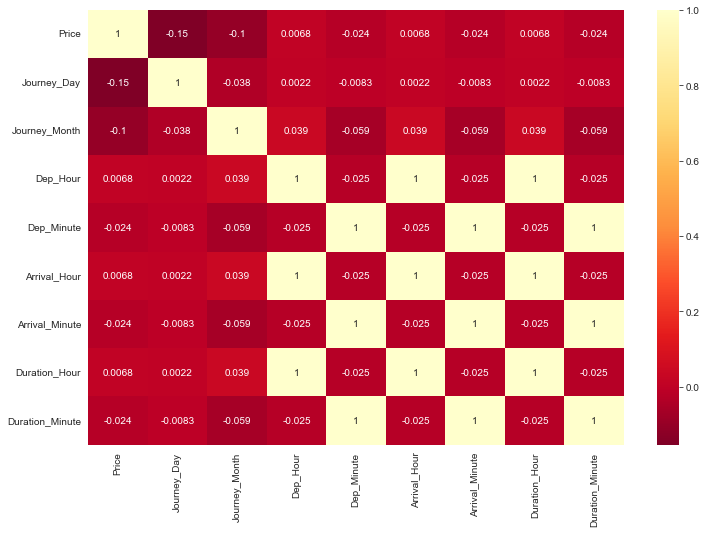

In [155]:
# Let's Visualize the train dataset's correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(train_corr.corr(), cmap= "YlOrRd_r", annot= True)

# Removing outliers and skewness

TRAIN DATASET

In [156]:
# Let's check the skewness of the data before removing the outliers.

df_flight_train.skew()

Price                                          1.812552
Journey_Day                                    0.118351
Journey_Month                                 -0.387493
Dep_Hour                                       0.113073
Dep_Minute                                     0.167029
Arrival_Hour                                   0.113073
Arrival_Minute                                 0.167029
Duration_Hour                                  0.113073
Duration_Minute                                0.167029
Airline_Air India                              1.815130
Airline_GoAir                                  7.218042
Airline_IndiGo                                 1.562748
Airline_Jet Airways                            0.582095
Airline_Jet Airways Business                  42.166335
Airline_Multiple carriers                      2.461716
Airline_Multiple carriers Premium economy     28.618184
Airline_SpiceJet                               3.185227
Airline_Trujet                               103

In [157]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_flight_train))
print(z.shape)

# Removing the outliers.

df_flight_train = df_flight_train.loc[(z<3).all(axis=1)]
print(df_flight_train.shape)

(10683, 29)
(7589, 29)


By comparing shape of 'z' and 'df_flight_train' shape , 3094 rows have been removed as an outlier.

In [158]:
# Treating the skewness with sqrt function.

for col in df_flight_train.columns:
    if df_flight_train.skew().loc[col]>0.55:
        df_flight_train[col]=np.sqrt(df_flight_train[col])

In [159]:
# Again checking the skewness after treament.

df_flight_train.skew()

Price                                        0.213552
Journey_Day                                  0.118811
Journey_Month                               -0.685554
Dep_Hour                                     0.070003
Dep_Minute                                   0.243982
Arrival_Hour                                 0.070003
Arrival_Minute                               0.243982
Duration_Hour                                0.070003
Duration_Minute                              0.243982
Airline_Air India                                 inf
Airline_GoAir                                0.000000
Airline_IndiGo                                    inf
Airline_Jet Airways                          0.310768
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                         inf
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet                               0.000000
Airline_Vistara             

The skewness have been reduced or treated to it's most possible extent.

TEST DATASET

In [160]:
# Let's check the skewness of the data before removing the outliers.

df_flight_test.skew()

Journey_Day                                   0.199540
Journey_Month                                -0.403700
Dep_Hour                                      0.093759
Dep_Minute                                    0.128515
Arrival_Hour                                  0.093759
Arrival_Minute                                0.128515
Duration_Hour                                 0.093759
Duration_Minute                               0.128515
Airline_Air India                             1.808687
Airline_GoAir                                 7.425946
Airline_IndiGo                                1.570462
Airline_Jet Airways                           0.695618
Airline_Jet Airways Business                 36.523949
Airline_Multiple carriers                     2.202763
Airline_Multiple carriers Premium economy    29.804900
Airline_SpiceJet                              3.152294
Airline_Vistara                               4.216176
Airline_Vistara Premium economy              36.523949
Source_Che

In [161]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_flight_test))
print(z.shape)

# Removing the outliers.

df_flight_test = df_flight_test.loc[(z<3).all(axis=1)]
print(df_flight_test.shape)

(2671, 27)
(1905, 27)


By comparing shape of 'z' and 'df_flight_test' shape , 766 rows have been removed as an outlier.

In [162]:
# Treating the skewness with sqrt function.

for col in df_flight_test.columns:
    if df_flight_test.skew().loc[col]>0.55:
        df_flight_test[col]=np.sqrt(df_flight_test[col])

In [163]:
# Again checking the skewness after treament.

df_flight_train.skew()

Price                                        0.213552
Journey_Day                                  0.118811
Journey_Month                               -0.685554
Dep_Hour                                     0.070003
Dep_Minute                                   0.243982
Arrival_Hour                                 0.070003
Arrival_Minute                               0.243982
Duration_Hour                                0.070003
Duration_Minute                              0.243982
Airline_Air India                                 inf
Airline_GoAir                                0.000000
Airline_IndiGo                                    inf
Airline_Jet Airways                          0.310768
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                         inf
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet                               0.000000
Airline_Vistara             

The cleaning of the data is done. So now, let's move further and do the testing and training of data by splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done.

# Separating the input and output variables

In [164]:
# Let's Separating the input and target variables

X = df_flight_train.drop(columns=["Price"])
y = df_flight_train[["Price"]]

In [165]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(7589, 28)
(7589, 1)


In [166]:
# Let's check the head of the input variables.
X.head()

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,1,5,5,50,5,50,5,50,1.0,0,...,0,0,0,1.0,0,0,0.0,0,0,0
2,9,6,9,25,9,25,9,25,0.0,0,...,0,0,1,0.0,0,1,0.0,0,0,0
3,12,5,18,5,18,5,18,5,0.0,0,...,0,0,0,1.0,0,0,0.0,0,0,0
9,27,5,11,25,11,25,11,25,0.0,0,...,0,0,1,0.0,0,1,0.0,0,0,0
10,1,6,9,45,9,45,9,45,1.0,0,...,0,0,1,0.0,0,1,0.0,0,0,0


In [167]:
# Let's check the head of the output variables.
y.head()

,Price
1,7662
2,13882
3,6218
9,8625
10,8907


# Standard Scaling

In [168]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.50059565,  0.07196866, -1.33715874, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56004907,  1.01040539, -0.63180849, ...,  0.        ,
         0.        ,  0.        ],
       [-0.20734411,  0.07196866,  0.95522957, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.55618072, -0.86646806,  1.30790469, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.55618072, -0.86646806, -0.80814606, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56004907,  0.07196866, -0.45547093, ...,  0.        ,
         0.        ,  0.        ]])

# Training And Testing the Models

In [169]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [170]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [171]:
# Finding the best alpha value for Ridge regression using GridsearchCV.

rg = Ridge()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(rg, parameters)
gd.fit(X, y)
gd.best_params_

{'alpha': 0.0001}

In [172]:
# Finding the best alpha value for Ridge regression using GridsearchCV.

lreg = Lasso()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(lreg, parameters)
gd.fit(X, y)
gd.best_params_

{'alpha': 0}

In [173]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso(alpha=0.001)
rg = Ridge(alpha=0.1)
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()

In [174]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))

In [175]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.5365657034946553 achieved at 96


Train acc 0.5013747595295943


Mean Absolute Error :  46.29784782232185


RMSE :  2700.04256996155


Cross validation score (Mean r2 score): 0.49848885593769515
Standard Deviationin r2 score : 0.00923780219364648




-------- Lasso --------
Maximum r2 score : 0.5372627223703573 achieved at 96


Train acc 0.5025720406091052


Mean Absolute Error :  46.2976986300187


RMSE :  2697.721773410321


Cross validation score (Mean r2 score): 0.4987971094472754
Standard Deviationin r2 score : 0.009390719028072807




-------- Ridge --------
Maximum r2 score : 0.537264328283443 achieved at 96


Train acc 0.5025720377272083


Mean Absolute Error :  46.2977663335164


RMSE :  2697.7244401248


Cross validation score (Mean r2 score): 0.49879706114189404
Standard Deviationin r2 score : 0.009390907933668598




-------- SVR --------
Maximum r2 score : 0.061146902350263876 achieved at 55


Train acc 0.059594978066

RandomForestRegressor is selected as a model for this dataset as it is giving the best results out of all the algorithms tested, with the accuracy of 0.75 at 88.

In [176]:
# saving the model using joblib
import joblib

# Save the model as a pickle in a file
joblib.dump(rfr, 'flight.pkl')

['flight.pkl']